In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/santi/miniconda3/envs/data_science/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


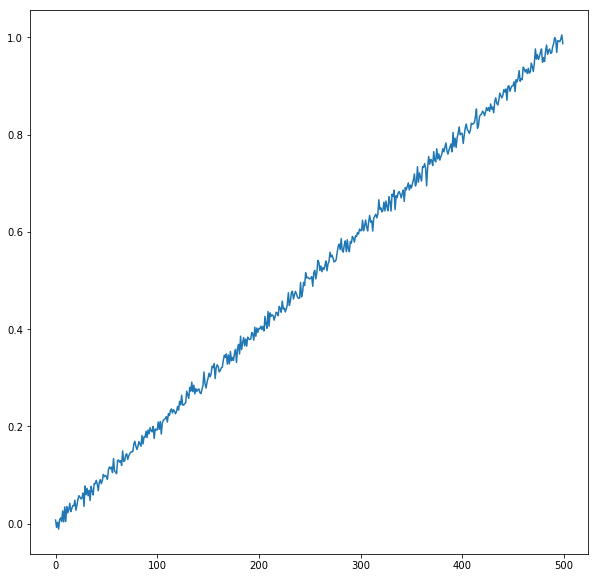

In [2]:
# Create sample data
num_samples = 500
x = np.linspace(0, 1, num_samples) + 0.01*np.random.randn(num_samples)
plt.figure(figsize=(10, 10))
plt.plot(x)

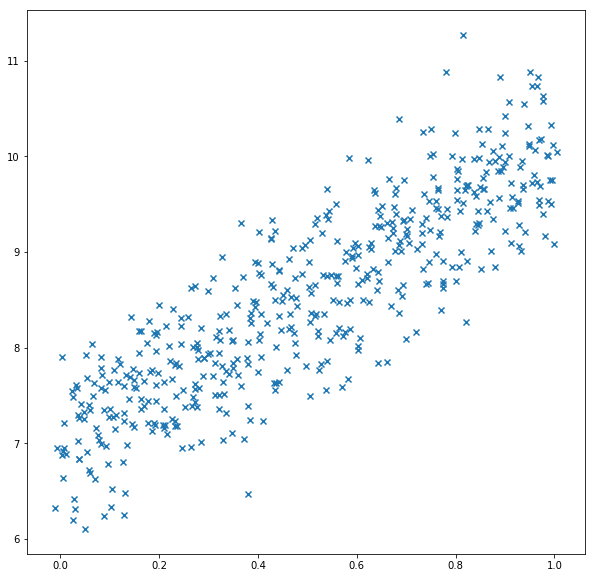

In [3]:
y = 3 * x + 7
y += 0.5*np.random.randn(num_samples)
plt.figure(figsize=(10, 10))
plt.scatter(x, y, marker='x')

In [4]:
x = np.atleast_2d(x)
y = np.atleast_2d(y)
print(x.shape)
print(y.shape)

(1, 500)
(1, 500)


# Linear regression in TF

In [5]:
# Slope 
a = tf.Variable(0.)
# Intercept
b = tf.Variable(1.0)
# LR model
y_estimated = a * x + b 

In [6]:
# Cost function
loss = tf.reduce_mean(tf.square(y - y_estimated))
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [77]:
# Train main loop
loss_values = []
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    print('Initial values: a={}  b={} loss={}'.format(
        *session.run([a, b, loss])
    ))
    for step in range(150):
        print('Step {}'.format(step))
        opt_res = session.run([train, loss, a, b])
        print('Loss={}  a={}  b={}'.format(*opt_res[1:]))
        print()
        loss_values.append(opt_res[1])

Initial values: a=0.0  b=1.0 loss=57.60578536987305
Step 0
Loss=57.60578536987305  a=0.08041410148143768  b=1.1504342555999756

Step 1
Loss=54.73299789428711  a=0.15878435969352722  b=1.297054648399353

Step 2
Loss=52.00410079956055  a=0.2351626455783844  b=1.439958095550537

Step 3
Loss=49.411903381347656  a=0.30959945917129517  b=1.579238772392273

Step 4
Loss=46.94953155517578  a=0.38214409351348877  b=1.7149885892868042

Step 5
Loss=44.61050796508789  a=0.452844500541687  b=1.847297191619873

Step 6
Loss=42.388641357421875  a=0.5217475295066833  b=1.9762517213821411

Step 7
Loss=40.27806091308594  a=0.5888987183570862  b=2.1019372940063477

Step 8
Loss=38.2732048034668  a=0.654342532157898  b=2.2244369983673096

Step 9
Loss=36.3687629699707  a=0.7181223034858704  b=2.3438315391540527

Step 10
Loss=34.55971145629883  a=0.7802802324295044  b=2.4601995944976807

Step 11
Loss=32.84126663208008  a=0.8408574461936951  b=2.573617935180664

Step 12
Loss=31.208906173706055  a=0.899894118309

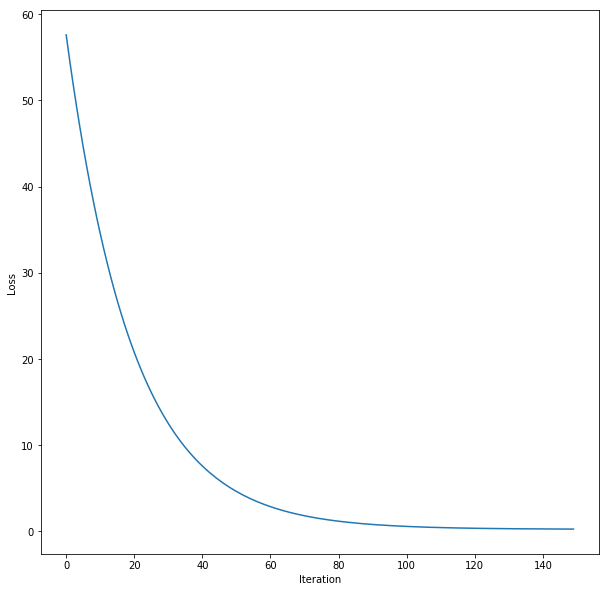

In [78]:
plt.figure(figsize=(10, 10))
plt.plot(loss_values)
plt.ylabel('Loss')
plt.xlabel('Iteration')